# Lending Club Loan Casestudy

### We will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). 
### Lending Club is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

### These files contain complete lending data for all loans issued from 2007-2010 and try to classify and predict whether or not the borrower paid back their loan in full. The file is a matrix of about 9500 observations and 14 variables. 

### Data dictionary
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other”).
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower’s number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid (Target Variable): Whether or not the borrower paid back their loan 

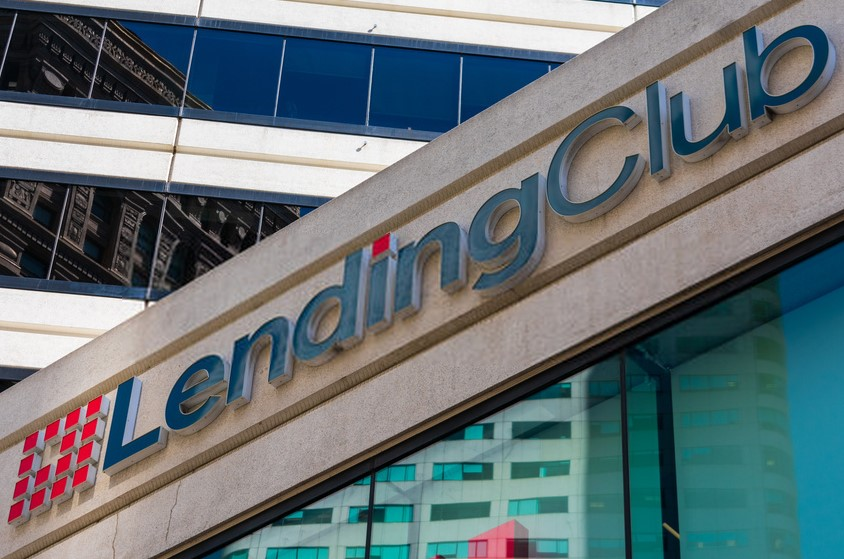

## Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## Setting Working Directory

In [2]:
os.chdir(r'G:\PYTHON JUPYTER NOTEBOOK\Lending Club Casestudy')
os.getcwd()

'G:\\PYTHON JUPYTER NOTEBOOK\\Lending Club Casestudy'

## Importing data

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Basic EDA of dataset

In [5]:
df.shape

(9578, 14)

In [6]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
# Now we will check the descriptive statistics of our numerical features
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [9]:
# Descriptive statistics for both numerical and categorical variables
df.describe(include="all")

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


In [10]:
# Descriptive statistics for categorical variables
df.describe(include="O")

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


## Data-Preprocessing

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


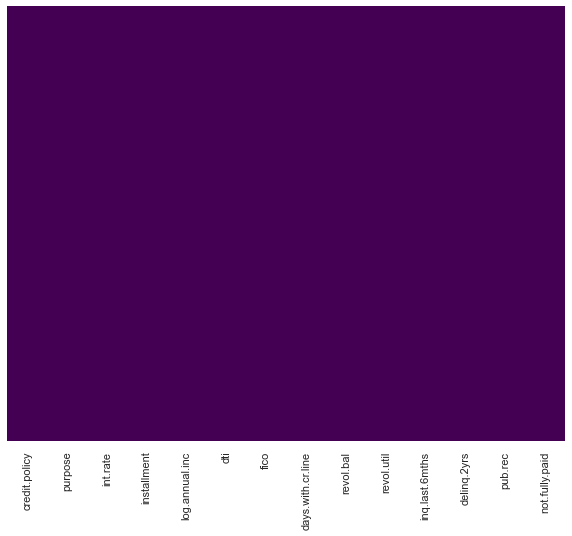

In [11]:
#checking for missing values in the final dataset
print(df.isnull().sum())

# to see missing value using visualisation
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

So there are no missing values in the dataset

In [12]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [13]:
# renaming the column names
df.rename(columns={'credit.policy': 'creditpolicy'}, inplace=True)
df.rename(columns={'int.rate': 'intrate'}, inplace=True)
df.rename(columns={'log.annual.inc': 'logannualinc'}, inplace=True)
df.rename(columns={'days.with.cr.line': 'dayswithcrline'}, inplace=True)
df.rename(columns={'revol.bal': 'revolbal'}, inplace=True)
df.rename(columns={'revol.util': 'revolutil'}, inplace=True)
df.rename(columns={'inq.last.6mths': 'inqlast6mths'}, inplace=True)
df.rename(columns={'delinq.2yrs': 'delinq2yrs'}, inplace=True)
df.rename(columns={'pub.rec': 'pubrec'}, inplace=True)
df.rename(columns={'not.fully.paid': 'notfullypaid'}, inplace=True)

In [14]:
df.head()

,creditpolicy,purpose,intrate,installment,logannualinc,dti,fico,dayswithcrline,revolbal,revolutil,inqlast6mths,delinq2yrs,pubrec,notfullypaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Exploratory Data Analysis
### Uni-Variate Analysis

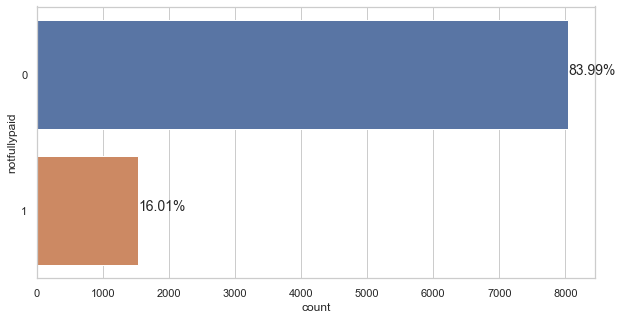

In [15]:
# Target variable -------> notfullypaid

plt.figure(figsize=(10,5))
plt.rc("font", size=14)
ax = sns.countplot(y ='notfullypaid',data=df)
total = len(df['notfullypaid'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
plt.rc("font", size=14)
plt.show()

### After checking the plot, it implies that this Lending Club Loan data is highly imbalanced. We will use SMOTE technique to balance the data

In [16]:
df['notfullypaid'].value_counts()

0    8045
1    1533
Name: notfullypaid, dtype: int64

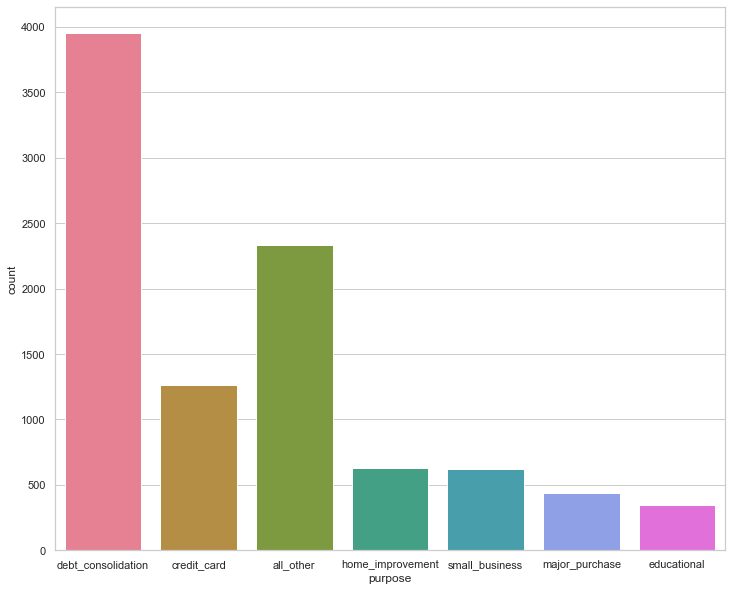

In [17]:
plt.figure(figsize=(12,10))
sns.countplot(x ='purpose', data = df, palette ='husl')
plt.show()

In [18]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

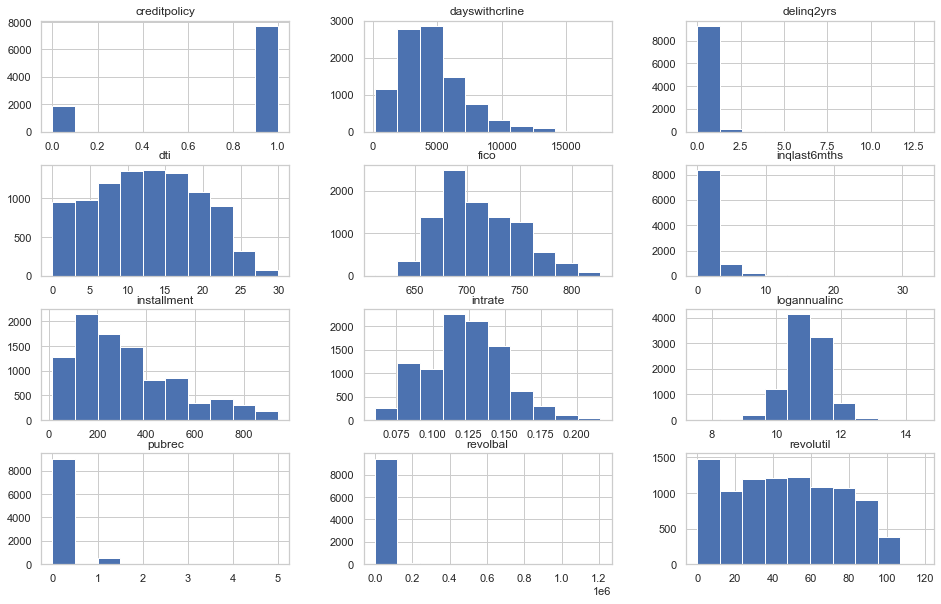

In [19]:
# For Numerical variables
columns = df.columns.tolist()
num_col = ['creditpolicy', 'intrate', 'installment', 'logannualinc', 'dti', 'fico', 'dayswithcrline',
           'revolbal', 'revolutil','inqlast6mths', 'delinq2yrs', 'pubrec']

df[num_col].hist(figsize=(16,10))
plt.show()

### Bi-Variate Analysis

In [20]:
cat_col = ['creditpolicy', 'purpose', 'delinq2yrs', 'pubrec', 'notfullypaid']

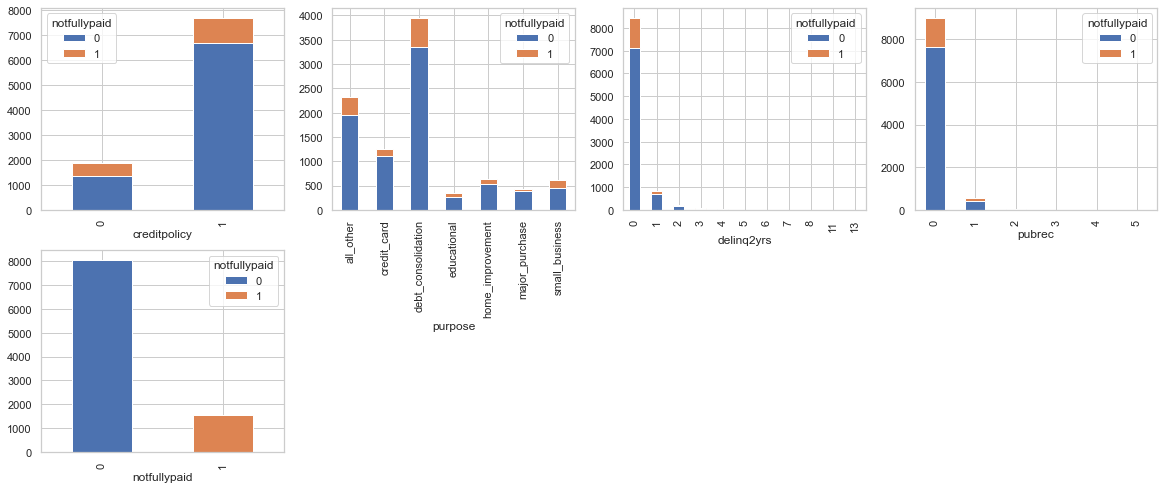

In [21]:
fig = plt.figure(figsize=(20,26))
for idx,i in enumerate(cat_col):
    crosstab = pd.crosstab(index=df[i], columns=df["notfullypaid"])
    ax=plt.subplot(6,4,idx+1)
    crosstab.plot(kind="bar",stacked=True,ax=ax)

### Boxplots for Continuous Vs Categorical columns

### Mutivariate Analysis

#### PairPlots

In [22]:
df.head()

,creditpolicy,purpose,intrate,installment,logannualinc,dti,fico,dayswithcrline,revolbal,revolutil,inqlast6mths,delinq2yrs,pubrec,notfullypaid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


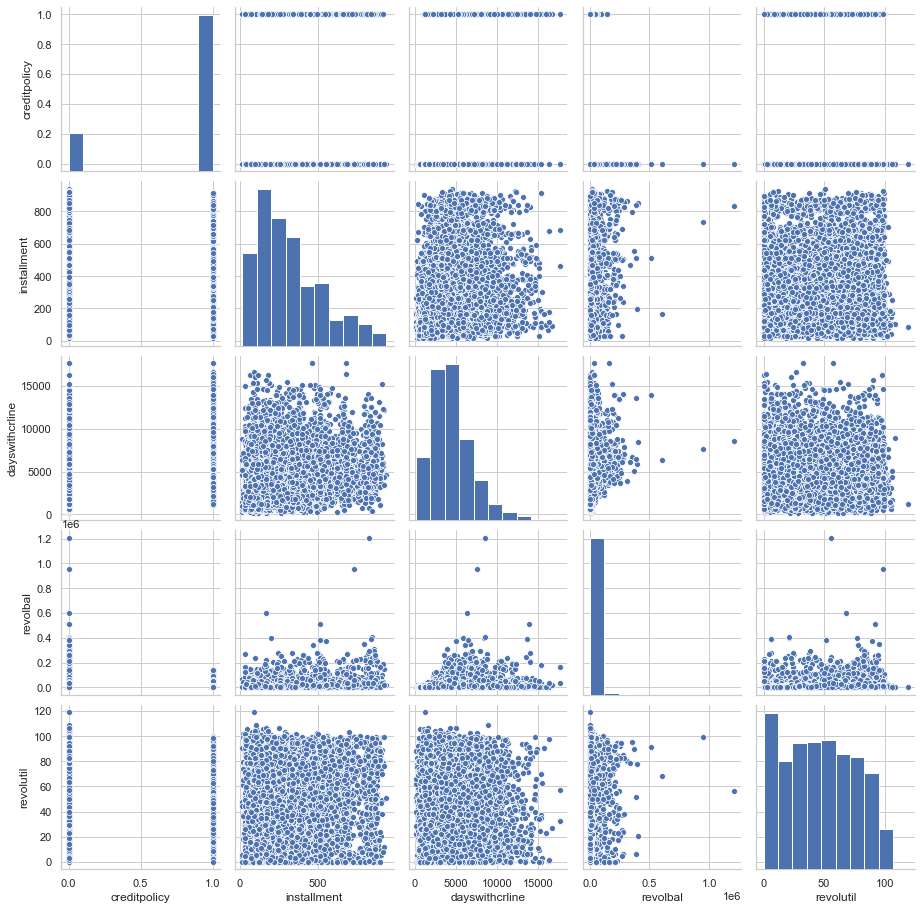

In [23]:
# Let's look at the pairplot for numerical variables
sns.set_style('whitegrid')
sns.pairplot(df[['creditpolicy','installment','dayswithcrline','revolbal','revolutil']])
plt.show()

## Feature Engineering

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

In [25]:
# creating dummies for categorical variables
X_Dummies = pd.get_dummies(df[['purpose']])
X_Dummies.head()

,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [26]:
# merging both dummies data for categorical var and the original data using pd.concat
df_final = pd.concat([df,X_Dummies],axis=1)

In [27]:
df_final.head()

,creditpolicy,purpose,intrate,installment,logannualinc,dti,fico,dayswithcrline,revolbal,revolutil,...,delinq2yrs,pubrec,notfullypaid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,...,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,...,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,...,0,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,...,0,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,...,1,0,0,0,1,0,0,0,0,0


In [28]:
# dropping the repeated columns 
df_final = df_final.drop(['purpose'],axis=1)

In [29]:
df_final.head()

,creditpolicy,intrate,installment,logannualinc,dti,fico,dayswithcrline,revolbal,revolutil,inqlast6mths,delinq2yrs,pubrec,notfullypaid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


## Statistical Testing
* Correlation Test

In [30]:
df_final.corr()

,creditpolicy,intrate,installment,logannualinc,dti,fico,dayswithcrline,revolbal,revolutil,inqlast6mths,delinq2yrs,pubrec,notfullypaid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
creditpolicy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.025412,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
intrate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124000,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.203103,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
logannualinc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.080077,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.125825,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.067184,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
dayswithcrline,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.056574,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revolbal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.067728,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revolutil,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.138535,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inqlast6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.017795,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


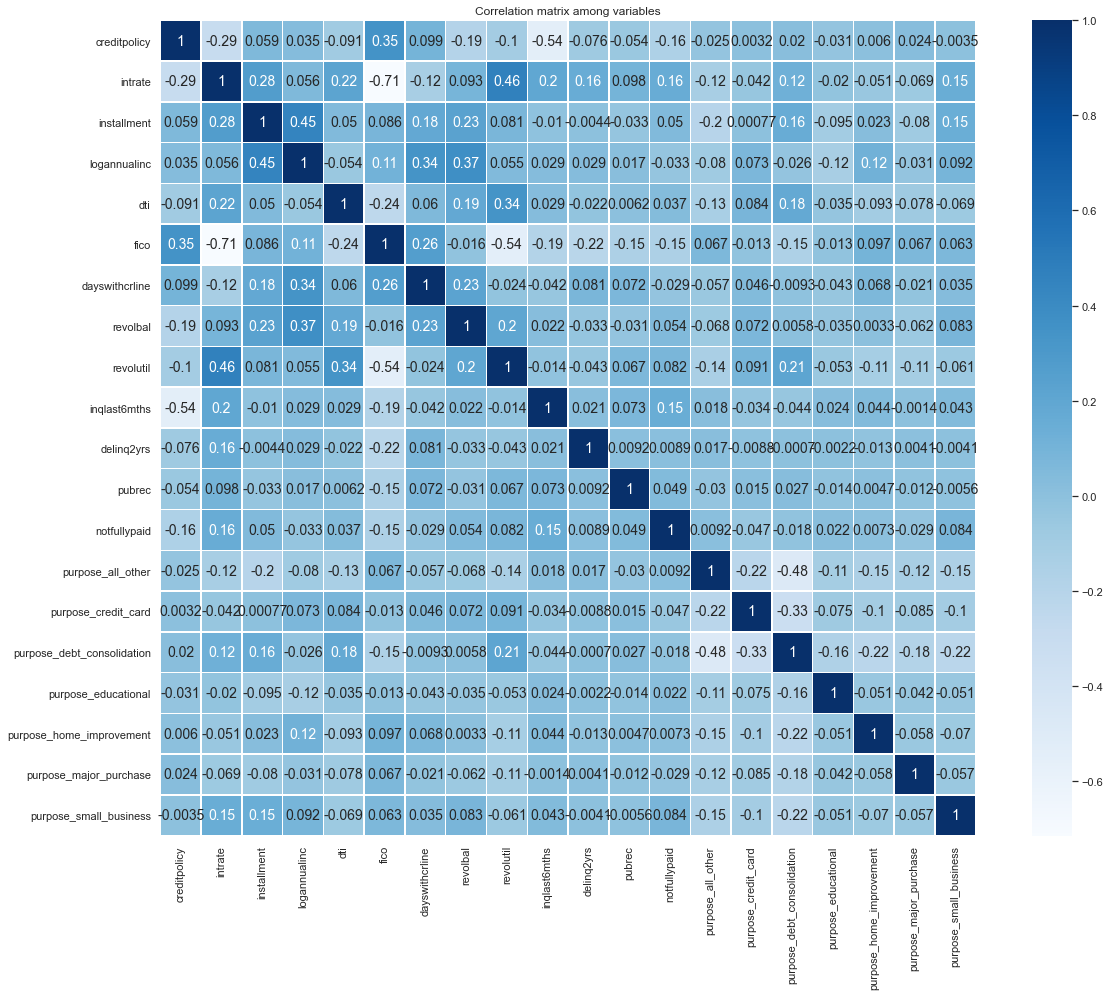

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(df_final.corr(), square=True, annot=True, linewidths=.5, cmap="Blues")
plt.title("Correlation matrix among variables")
plt.show()

## Creating the Independendent and Dependent Data Sets


In [32]:
# Feature or Independent variables
X = df_final.drop(["notfullypaid"],axis = 1)

In [33]:
X.head()

,creditpolicy,intrate,installment,logannualinc,dti,fico,dayswithcrline,revolbal,revolutil,inqlast6mths,delinq2yrs,pubrec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [34]:
# Label or Dependent variable
y = df_final["notfullypaid"]

In [35]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: notfullypaid, Length: 9578, dtype: int64

## Feature Importance

In [36]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

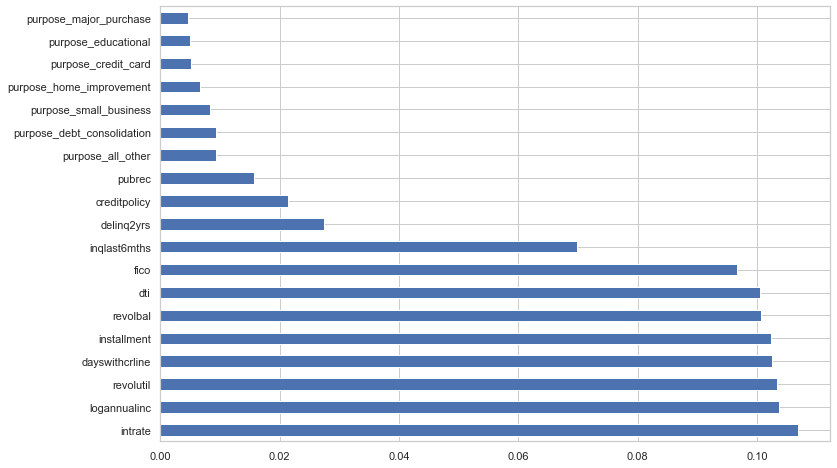

In [37]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Model Building

In [38]:
# Splitting the dataset into the Training set and Test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [40]:
X_train.shape

(6704, 19)

In [41]:
X_test.shape

(2874, 19)

In [42]:
y_train.shape

(6704,)

In [43]:
y_test.shape

(2874,)

## Standarisation of data

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [46]:
X_test_scaled = scaler.transform(X_test)

## Synthetic Minority Oversampling Technique (SMOTE) to solve the problem of Imbalanced Data

In [47]:
# import SMOTE oversampling and other necessary libraries 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [48]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train_scaled, y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))

Before oversampling:  Counter({0: 5639, 1: 1065})
After oversampling:  Counter({0: 5639, 1: 5639})


## Logistic Regression Model

In [49]:
# Fitting Multiple Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_SMOTE, y_train_SMOTE)

LogisticRegression()

## Prediction of the Model

In [50]:
# Predicting the Test (Test_Scaled) set results 
y_pred = classifier.predict(X_test_scaled)

In [51]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

In [53]:
confusion_matrix

array([[1468,  938],
       [ 171,  297]], dtype=int64)

## Confusion Matrix

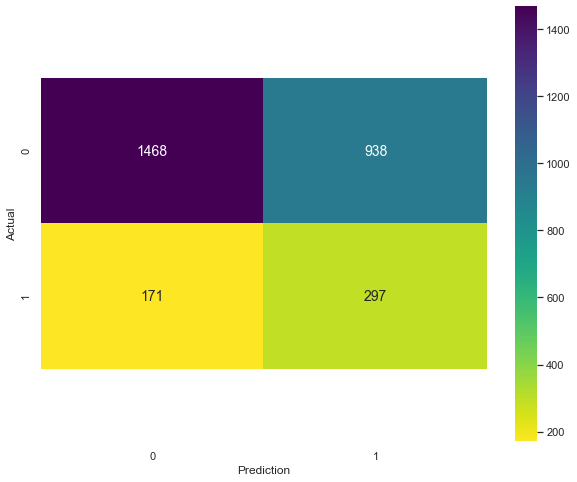

In [54]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [55]:
#### CLASSIFICATION REPORT ####
from sklearn.metrics import classification_report
print("=======================================================================\n")
print(classification_report(y_test, y_pred))
print("=======================================================================\n")
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test_scaled, y_test)))


              precision    recall  f1-score   support

           0       0.90      0.61      0.73      2406
           1       0.24      0.63      0.35       468

    accuracy                           0.61      2874
   macro avg       0.57      0.62      0.54      2874
weighted avg       0.79      0.61      0.66      2874


Accuracy of logistic regression classifier on test set: 0.61


In [56]:
from sklearn.metrics import mean_squared_error

In [57]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.621187


## ROC AUC CURVE

ROC curve plots the true positive rate against false positive rate

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score

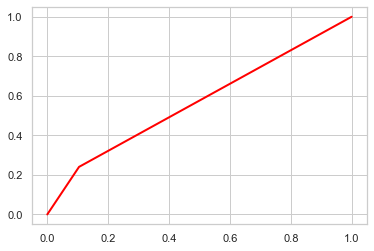

In [59]:
##Computing false and true positive rates
fpr, tpr,_= roc_curve(classifier.predict(X_test_scaled),y_test,drop_intermediate=False)

#plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

In [60]:
roc_auc_score(classifier.predict(X_test_scaled),y_test)

0.5680769601292385

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

In [62]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [63]:
dtree.fit(X_train_SMOTE, y_train_SMOTE)

DecisionTreeClassifier()

In [64]:
# Predict on test set
dt_pred = dtree.predict(X_test_scaled)

In [65]:
dt_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
# Compute confustion matrix
dtc_conf = confusion_matrix(y_test, dt_pred)
dtc_conf

array([[1900,  506],
       [ 338,  130]], dtype=int64)

### Confusion Matrix

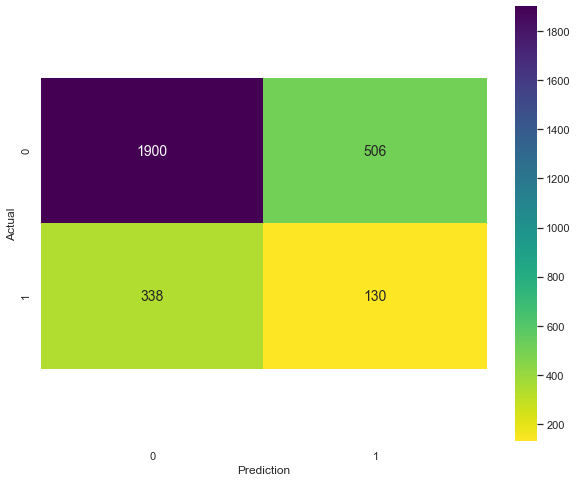

In [67]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(dtc_conf), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [68]:
#### CLASSIFICATION REPORT ####
print("=======================================================================\n")
print(classification_report(y_test, dt_pred))
print("=======================================================================\n")
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(dtree.score(X_test_scaled, y_test)))


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2406
           1       0.20      0.28      0.24       468

    accuracy                           0.71      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.71      0.72      2874


Accuracy of Decision Tree Classifier on test set: 0.71


In [69]:
# RMSE of Decision Tree
rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.541911


## Random Forest Model

In [70]:
# building random forest model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [71]:
# predicting the test results
rfc_pred = rfc.predict(X_test_scaled)
rfc_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc_pred)
cm

array([[2226,  180],
       [ 391,   77]], dtype=int64)

### Confusion Matrix

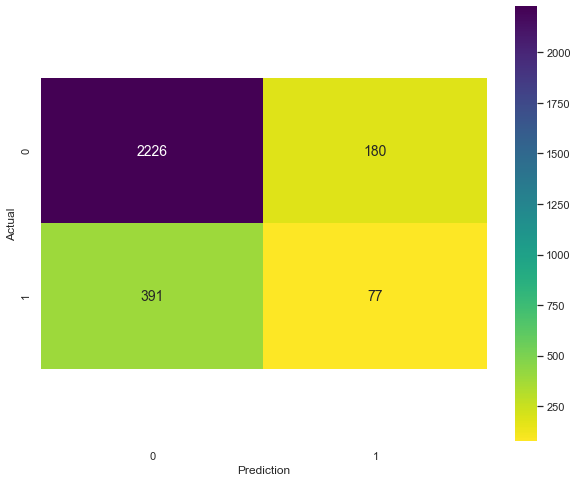

In [73]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'viridis_r', fmt = 'd')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [74]:
#### CLASSIFICATION REPORT ####
print("=======================================================================\n")
print(classification_report(y_test, rfc_pred))
print("=======================================================================\n")
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rfc.score(X_test_scaled, y_test)))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2406
           1       0.30      0.16      0.21       468

    accuracy                           0.80      2874
   macro avg       0.58      0.54      0.55      2874
weighted avg       0.76      0.80      0.78      2874


Accuracy of Random Forest Classifier on test set: 0.80


In [75]:
# RMSE of RF
rmse = np.sqrt(mean_squared_error(y_test, rfc_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.445733


## If we compare all the models, the random forest classifier yielded the best results in terms of the accurcay and f1-score.

## RMSE of Random Forest model is low as compared to decision tree and logistic regression models. Lower the RMSE better is model performance